# K-Means Baseline

Using K-means as a baseline approach to compare all future models against. This approach uses only the crash data and ignores all the auxillary data (i.e. road segement, weather, and Uber speed data). Thus any model that takes advantage of the additional data should perform at least better than this one to be considered useful.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import Support as Sup
import Clustering as Cl
import Optimization as Opt
import PreProcessing as Proc

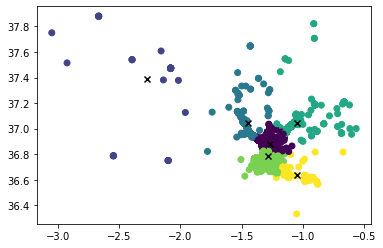

Sum of distance with K-Mean: 2088.064843168605


In [2]:
kmeans = Cl.Kmeans(plot = 1)
crashes = Sup.Load_Crash_Data()
crash_locations = np.delete(crashes, 0, 1).astype(float)
kmeans.Train(crash_locations, crashes)
performance = Sup.Competition_Metric([kmeans.centers], crashes, time_dep =0)
print("Sum of distance with K-Mean: " + str(performance))

In [3]:
crash_locations[:, [1, 0]] = crash_locations[:, [0, 1]]
segments_merged = Sup.Load_Merge_Road()
segments_merged = Proc.merge_roads_crashes(segments_merged, crash_locations)
segments_merged.plot(column='55_90', figsize=(20, 8))

ValueError: Length of values (0) does not match length of index (1535)

In [ ]:
#segments_merged.to_csv (r'Data\export_merged.csv', index = False, header=True)

In [ ]:
#from shapely.geometry import Point, LineString
#segments_merged['geometry'][0].distance(segments_merged['geometry'][3])
#segments_merged['geometry'][7].distance(Point(0,0))


In [ ]:
#correlation_matrix = segments_merged.iloc[:,3:].corr().abs()
#print(correlation_matrix['target'].sort_values(ascending=False).head())